In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bar_chart_race as bar
from functools import reduce

In [2]:
deliveries=pd.read_csv('C:\\Users\\NOMESH\\Downloads\\Project\deliveries.csv')

matches=pd.read_csv('C:\\Users\\NOMESH\\Downloads\\Project\matches.csv')

In [3]:
data=[deliveries,matches]

In [4]:
data[1].rename(columns={'id':'match_id'},inplace=True)

In [5]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [6]:
data[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   match_id         756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
# the columns used in this notebook are not required to clean

In [8]:
merge_deliveries_matches_data=pd.merge(data[0],data[1],on='match_id')

In [9]:
merge_deliveries_matches_data['date']= pd.to_datetime(merge_deliveries_matches_data['date'])

In [10]:
#find inning in which batsman have bowled
batsman_innings=deliveries.groupby(['batsman']).agg({'match_id':'nunique'})

batsman_innings.rename(columns={'match_id':'innings'},inplace=True)


In [11]:
#extracting ball faced by each batsman
total_balls_faced_by_batsman=pd.DataFrame(deliveries[deliveries['wide_runs']==0].groupby('batsman')['ball'].count())

In [12]:
#calculating batsman runs
batsman_runs=pd.DataFrame(deliveries.groupby('batsman')['batsman_runs'].sum())

In [13]:
deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [14]:
#calculating how many times a player got out. this data will be used to calculate average of a batsman
#Average=total runs/how many times he got out
batsman_got_out=deliveries.groupby(['player_dismissed']).agg({'match_id':'nunique'}).sort_values('match_id')

In [15]:
#extracting the highest runs of each batsman in one match
highest_runs_of_every_player=(deliveries.groupby(["match_id","batsman"], as_index=False)['batsman_runs'].sum()
                              .sort_values('batsman_runs')
                              .drop_duplicates("batsman",keep='last')).drop('match_id',axis=1).set_index('batsman')

In [16]:
highest_runs_of_every_player.shape

(516, 1)

In [17]:
#assigning multiple dataframe of a batsman to list so we can easily merge them
multiple_dataFrame_of_batsman=[batsman_innings,batsman_runs,total_balls_faced_by_batsman,highest_runs_of_every_player,batsman_got_out]

In [18]:
# merging all dataframes of batsman
batsman_stats=(reduce(lambda  left,right: pd.merge(left,right,left_index=True, right_index=True,how='outer'),
                     multiple_dataFrame_of_batsman))

In [19]:
#changing name of columns
(batsman_stats.rename(columns={'batsman_runs_x':'total_runs',
                               'ball':'ball_faced',
                               'batsman_runs_y':'highest_runs',
                               'match_id':'got_out'},inplace=True))

In [20]:
batsman_stats.head()

innings  total_runs  ball_faced  highest_runs  got_out
A Ashish Reddy     23.0       280.0       193.0          36.0     15.0
A Chandila          2.0         4.0         7.0           4.0      NaN
A Chopra            6.0        53.0        71.0          24.0      6.0
A Choudhary         3.0        25.0        20.0          15.0      1.0
A Dananjaya         1.0         4.0         5.0           4.0      NaN

In [21]:
#filling missing value
batsman_stats.fillna(0,inplace=True)

In [22]:
#giving columns type as int
batsman_stats=batsman_stats[['innings','ball_faced','total_runs','highest_runs','got_out']].astype(int)

In [23]:
#calculating average of batsman formula is mentioned earlier
batsman_stats['average']=batsman_stats['total_runs']/batsman_stats['got_out']

In [24]:
#replace nan and inf value with 0
batsman_stats.replace(np.inf,np.nan,inplace=True)

In [25]:
batsman_stats.sort_values('total_runs').tail()

innings  ball_faced  total_runs  highest_runs  got_out    average
S Dhawan       158        3671        4632            98      137  33.810219
DA Warner      126        3306        4741           126      109  43.495413
RG Sharma      182        3744        4914           109      155  31.703226
SK Raina       189        3917        5415           100      161  33.633540
V Kohli        169        4114        5434           113      143  38.000000

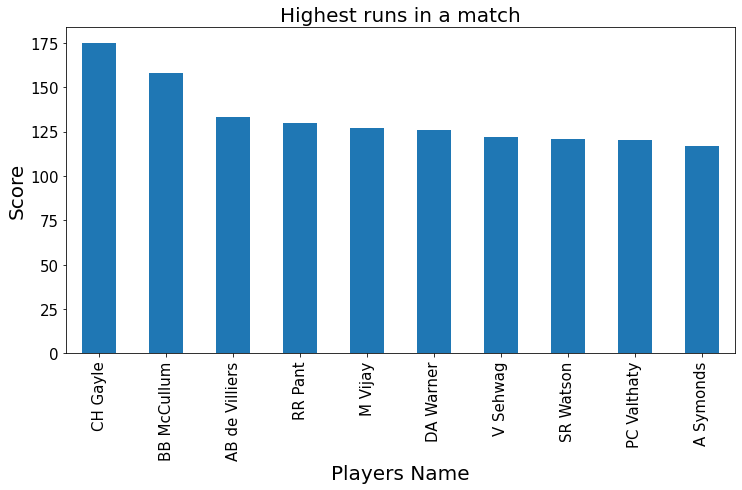

In [26]:
plt.title('Highest runs in a match',fontsize=20)
plt.xlabel('Players Name',fontsize=20)
plt.ylabel('Score',fontsize=20)
batsman_stats['highest_runs'].nlargest(10).plot.bar(figsize=(12,6),fontsize=15)

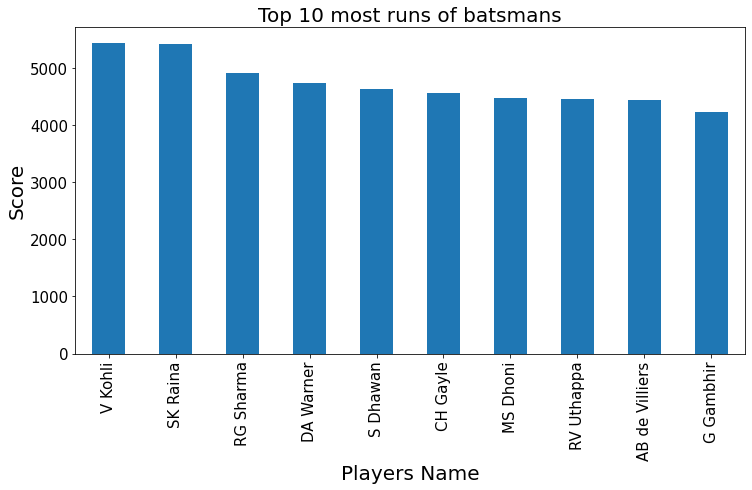

In [27]:
plt.title('Top 10 most runs of batsmans',fontsize=20)
plt.xlabel('Players Name',fontsize=20)
plt.ylabel('Score',fontsize=20)
batsman_stats['total_runs'].nlargest(10).plot.bar(figsize=(12,6),fontsize=15)

Text(0, 0.5, 'Score and balls')

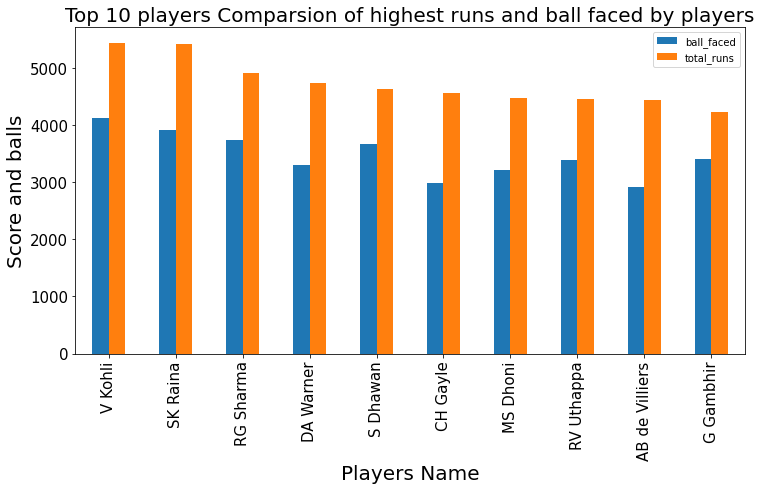

In [28]:
batsman_stats.iloc[: ,1:3].nlargest(10, 'total_runs').plot.bar(figsize=(12,6),fontsize=15)
plt.title('Top 10 players Comparsion of highest runs and ball faced by players',fontsize=20)
plt.xlabel('Players Name',fontsize=20)
plt.ylabel('Score and balls',fontsize=20)

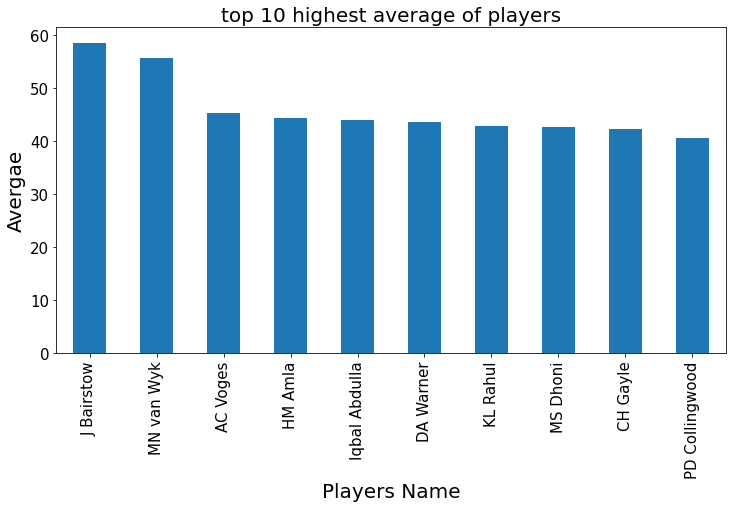

In [29]:
plt.title('top 10 highest average of players',fontsize=20)
plt.xlabel('Players Name',fontsize=20)
plt.ylabel('Avergae',fontsize=20)

batsman_stats['average'].nlargest(10).plot.bar(figsize=(12,6),fontsize=15)

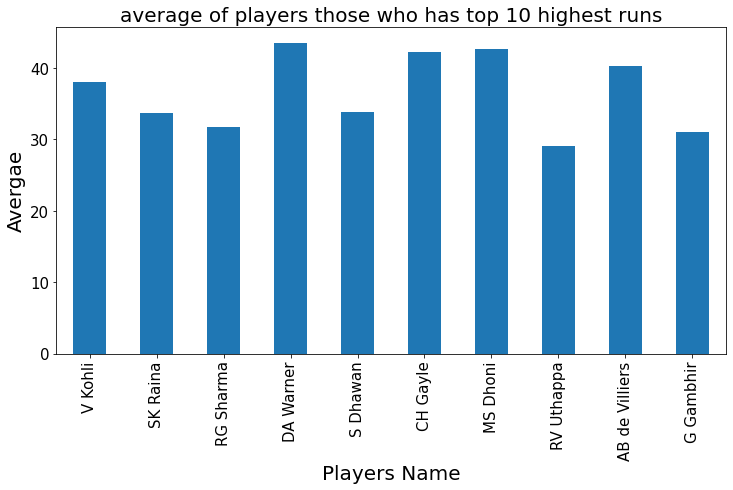

In [30]:
plt.title('average of players those who has top 10 highest runs',fontsize=20)
plt.xlabel('Players Name',fontsize=20)
plt.ylabel('Avergae',fontsize=20)

batsman_stats.loc[:,['total_runs','average']].nlargest(10,'total_runs')['average'].plot.bar(figsize=(12,6),fontsize=15)

# Creating a compatible dataset to create barchart race
# the fromat required to use bar chart race is:
# each row is represented by index which have a unique date, the value of next row should be equal to current row+next row

# for example if we have a column a=0,2,5,3,6,3,1 
# then we have to make it as 0,2,7,10,16,19,20

In [31]:
batsman_runs_by_date=(merge_deliveries_matches_data.groupby(['batsman','date'])['batsman_runs'].
                      sum().reset_index().sort_values(by='date',axis=0).reset_index().drop('index',axis=1))

In [32]:
batsmen=merge_deliveries_matches_data['batsman'].unique()

In [33]:
batsman_runs_by_date_copy=batsman_runs_by_date.copy()

In [34]:
for batsman in batsmen:
    batsman_runs_by_date_copy[batsman]=batsman_runs_by_date[batsman_runs_by_date['batsman']==batsman]['batsman_runs']

In [35]:
batsman_runs_by_date_copy.drop(['batsman','batsman_runs'],axis=1,inplace=True)

In [36]:
batsman_runs_by_date_copy=batsman_runs_by_date_copy.groupby('date').aggregate(np.sum)

In [37]:
rows = batsman_runs_by_date_copy.shape[0]
for row in range(1,rows):
    batsman_runs_by_date_copy.iloc[row] = batsman_runs_by_date_copy.iloc[row] + batsman_runs_by_date_copy.iloc[row-1]

In [38]:
batsman_runs_by_date_copy.shape

(546, 516)

In [39]:
for column in batsman_runs_by_date_copy.columns:
    if batsman_runs_by_date_copy[column].iloc[-1]==0:
        batsman_runs_by_date_copy.drop(column,axis=1,inplace=True)

In [40]:
batsman_runs_by_date_copy.shape

(546, 500)

In [41]:
bar.bar_chart_race(batsman_runs_by_date_copy, n_bars=10)

C:\Users\NOMESH\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NOMESH\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NOMESH\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NOMESH\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NOMESH\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NOMESH\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current